# **Feature Transformation**


**Normalization and Scaling:**
Features may have different scales and ranges, which can negatively impact the performance of certain machine learning algorithms. Normalization and scaling techniques (e.g., Min-Max scaling, Standardization) can bring features to a similar scale, making them more comparable and improving algorithm performance.

**Handling Skewed Distributions:**
Features with skewed distributions (e.g., exponential, power-law) may violate the assumptions of some machine learning algorithms, such as linear regression. Transforming skewed features using techniques like logarithmic or square root transformation can make the distributions more symmetric and improve model performance.



---


* Required in algorithms like Linear Regression where Gradient Descent is involved.

* Algorithms like KNN, k means, Clustering Techniques where distance metrics are involved requires Feature Transformation.

* Algorithms like Decision Trees, Random Forests, XGBoost etc do not require Feature Transformations to work.




**Do we require Feature Transformation in Deep Learning?**

**Yes!**

Here's why:
* Ensures that input features have similar scales, stabilizing training and improving convergence of deep learning models.

* Pixel values are typically scaled to a specific range to ensure stable optimization during training. **As pexels are from 0-255 we divide the pexels by 255 espically in case of CNN.**

* Similary in case of **ANN and RNN** we also use Transoformation Techniques.

**Types of Transformations:**

* Normalization & Standardization
* Scaling to Minimum and Maximum Values (Min Max Scaler)
* Scaling To Median And Quantiles
* **Guassian Transformations:**
  * Logarithmic Transformation
  * Reciprocal Trasformation
  * Square Root Transformation
  * Exponential Trasformation (can use any exponent)
  * Box Cox Transformation

# **GOLDEN WORDS:**
# **In Scaling, you’re changing the range of the data, while in Normalization, you’re changing the shape of the distribution of the data**

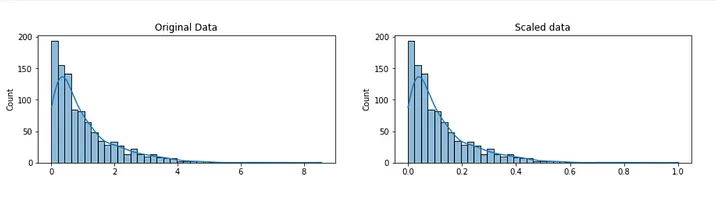

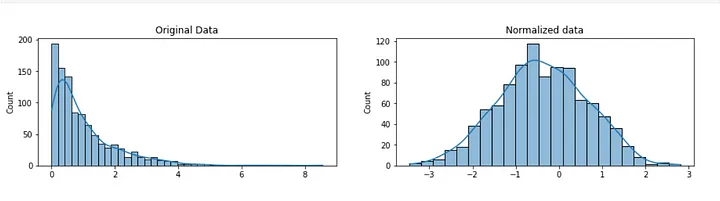

# **Normalization & Standardization**

Normalization is a broader concept having two main branches:
* Feature Scaling
* Distribution Transformation

**Normalization (In the Context of Feature Scaling):**

In the context of feature scaling, normalization often refers to the process of scaling individual samples to have unit norm. **This process does not change the distribution of the features** but rather adjusts the values in each feature vector so that they contribute equally to the distance computations.

**Normalization (In a Broader Statistical Context):**

Outside of the specific context of **feature scaling**, **"normalization"** can refer to broader statistical methods aimed at **making data more "normal" or Gaussian-like.**
Techniques like **log transformation, square root transformation, or Box-Cox transformation** can be used to reduce **skewness** and make the data more **symmetric**, **effectively changing the shape of the distribution.**


**Normalization:**
* Used when data does't have **Gaussian Distribution.**
* Normalization is useful when the features have **different scales** and the **algorithm does not assume any specific distribution of the data.**
* It is commonly used in algorithms that rely on **distance metrics**, such as **k-nearest neighbors and neural networks.**
* normalization methods like **Min-Max scaling** can be **sensitive** to outliers, other techniques like **robust scaling or standardization** are more robust and less affected by outliers.
* Robust scaling methods, such as the **RobustScaler** in scikit-learn, are designed to mitigate the impact of outliers by using robust estimators like the median and interquartile range.

# **Normalization itself contains many techniques, but if someone says Normalization without specifying any specific technique then they are taking about Min-Max Scaler**

**Standardization:**
* Standardization **(also known as z-score normalization)** transforms the data to have a mean of 0 and a standard deviation of 1.
* It is commonly used in algorithms that assume **zero-centered data**, such as **linear regression, logistic regression, and support vector machines.**
* Standardization is useful when the features have **different scales.**
*  **it is effective regardless of the data distribution**.
* Considered more effective when used on **Normally** distributed data.
* **This technique does not change the shape of the distribution; it merely

---

shifts and rescales the data. Skewed data before standardization will remain skewed afterwards.**


In [135]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
df=pd.read_csv('titanic.csv',usecols=['Pclass','Age', 'Fare', 'Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [137]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [138]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [139]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [140]:
df_scaled = pd.DataFrame(df_scaled)

cols = df.columns
df_scaled.columns = cols
df_scaled.head()

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


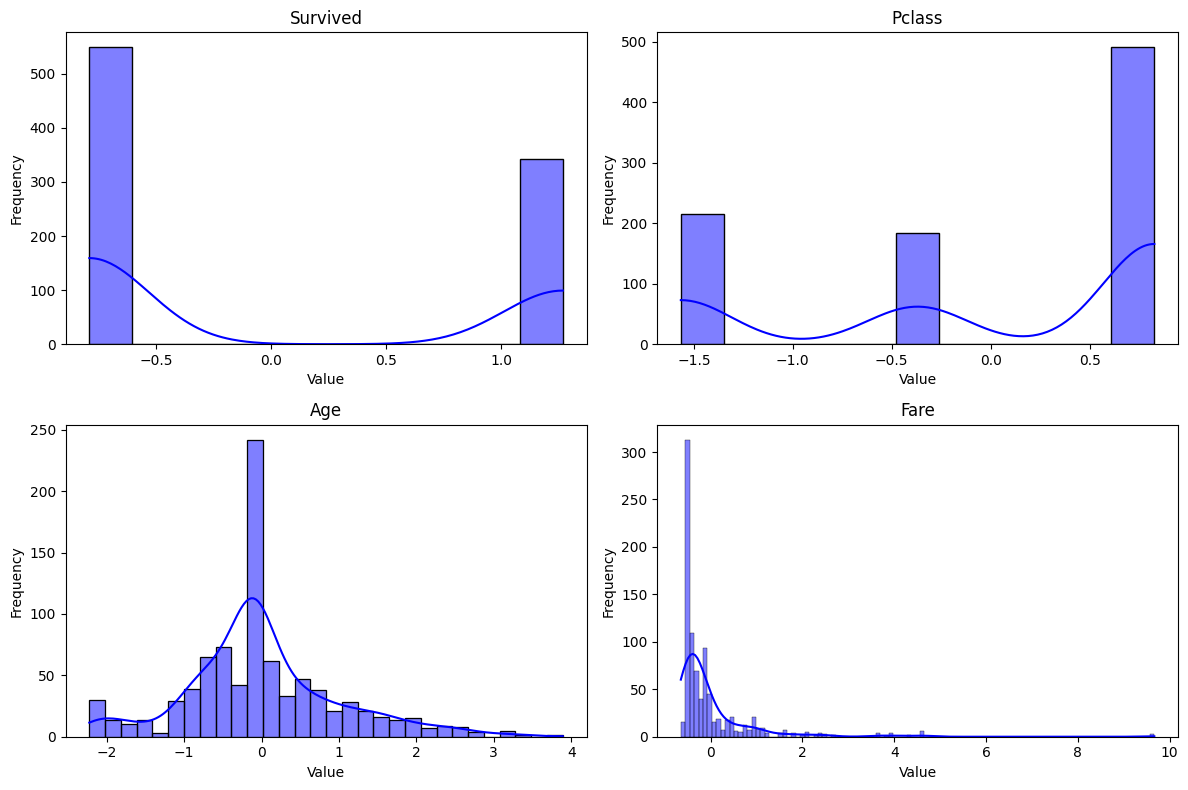

In [141]:
# Create subplots with 2 plots per row
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Plot histograms for each column
for i, column in enumerate(df_scaled.columns):
    sns.histplot(df_scaled[column], kde=True, color='blue', edgecolor='black', ax=axs[i])
    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Here Standardization just Scaled the data.

# **Min Max Scaler (Normalization)**

* Often used in Deep Learning, CV and Image Processing.

**Caution--**

**Outliers:** Min-Max Scaler is sensitive to outliers. If your data contains extreme values or outliers, scaling can cause most of your data to be squished in a small interval. In such cases, consider using Robust Scaler or other techniques that are less sensitive to outliers.

**Not centered data:** Min-Max Scaler does not center the data (i.e., does not change the mean to be 0), which might be a requirement for some algorithms.

**When the data is not uniformly distributed:** If the feature does not follow a normal distribution or the same distribution across features, the scaling might not work well.

In [142]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

mm_scaled_df = pd.DataFrame(mm_scaler.fit_transform(df), columns = df.columns)
mm_scaled_df.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


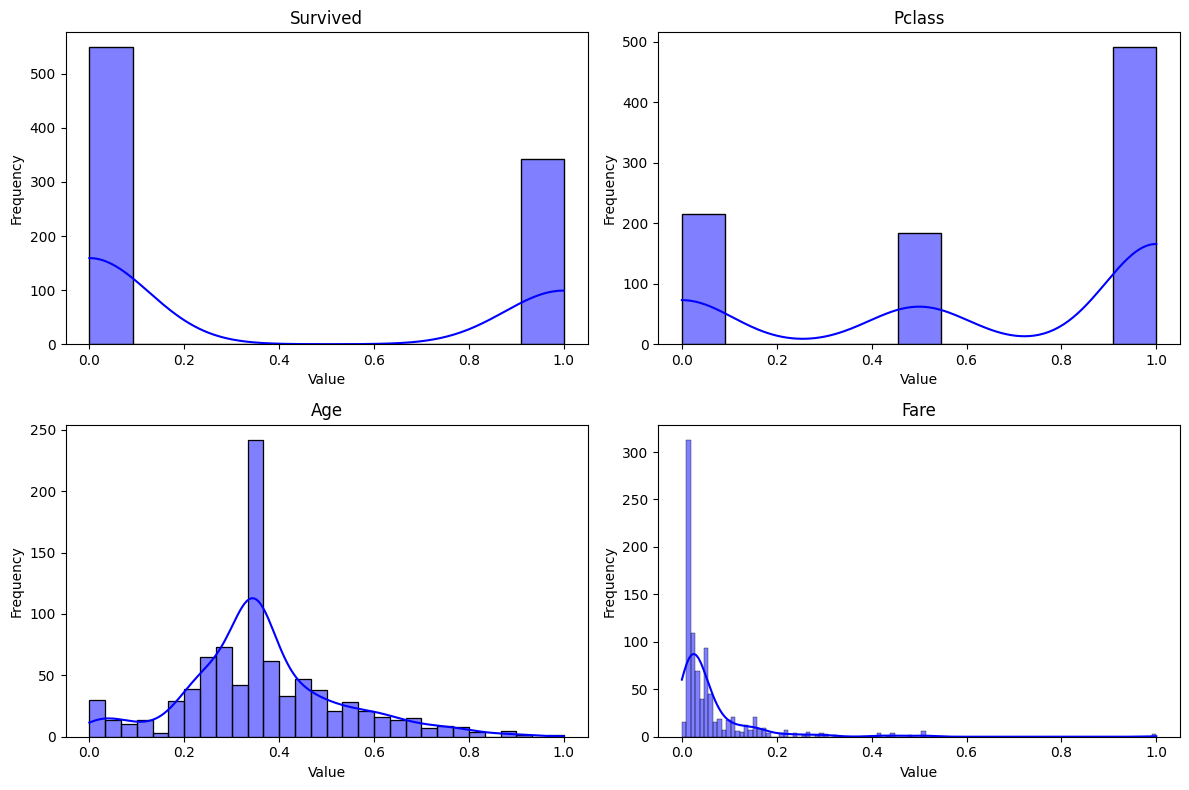

In [143]:
# Create subplots with 2 plots per row
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Plot histograms for each column
for i, column in enumerate(mm_scaled_df.columns):
    sns.histplot(mm_scaled_df[column], kde=True, color='blue', edgecolor='black', ax=axs[i])
    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Now it can be seen that all the values are between 0 to 1

# **Robust Scaler (Scaling To Median And Quantiles)**
* **Presence of Outliers:** When your data contains many outliers, **using mean and variance scaling (as in Standard Scaler)** can be heavily influenced by these extreme values. Robust Scaler uses the **median and IQR**, making it less sensitive to outliers.

* **When feature distributions are not Gaussian:** **Many scaling methods assume a normal distribution of features.** If your features have different distributions, particularly those that are not symmetric like Gaussian distributions, Robust Scaler can be a better choice because it does not rely on the mean and standard deviation.

* **Comparative feature importance:** In some models, especially **linear models**, it is essential to maintain the relative importance of features. Robust Scaler, by using the median and IQR, scales features using statistics that represent the bulk of the data. **This approach ensures that the scaling does not distort the relative importance of features as much as other scaling methods might when outliers are present.**

**However, there are situations where Robust Scaler might not be the best choice:**

* **Data without significant outliers:** If your dataset **does not contain significant outliers**, using Robust Scaler might not provide any benefit over other scaling methods, and simpler methods like **Min-Max Scaler or Standard Scaler might suffice.**

* **Requirement for normalized features:** **If your algorithm requires normalized features**(i.e., features scaled to have properties of a standard normal distribution with a mean of 0 and a standard deviation of 1), **Robust Scaler would not** be suitable since it does not ensure this kind of normalization.

**General Terms:**

* **Quantiles:** Quantiles are general terms used to describe any division of a dataset into equal parts. For example, quartiles and quintiles are specific types of quantiles.

* **Quartiles:** Quartiles divide a dataset into four equal parts. The first quartile (Q1) represents the 25th percentile, the second quartile (Q2) represents the median (50th percentile), and the third quartile (Q3) represents the 75th percentile. Quartiles are commonly used to understand the spread and central tendency of a dataset.

* **Quintiles:** Quintiles divide a dataset into five equal parts. Each quintile represents 20% of the data. For example, the first quintile (Q1) represents the 20th percentile, the second quintile (Q2) represents the 40th percentile, and so on. Quintiles provide more granularity than quartiles and are useful for analyzing larger datasets.

In addition to quartiles and quintiles, other quantiles exist, such as **deciles (dividing the data into ten equal parts) and percentiles (dividing the data into 100 equal parts).**

In [144]:
from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()

rb_scaled_df = pd.DataFrame(rb_scaler.fit_transform(df), columns = df.columns)
rb_scaled_df.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


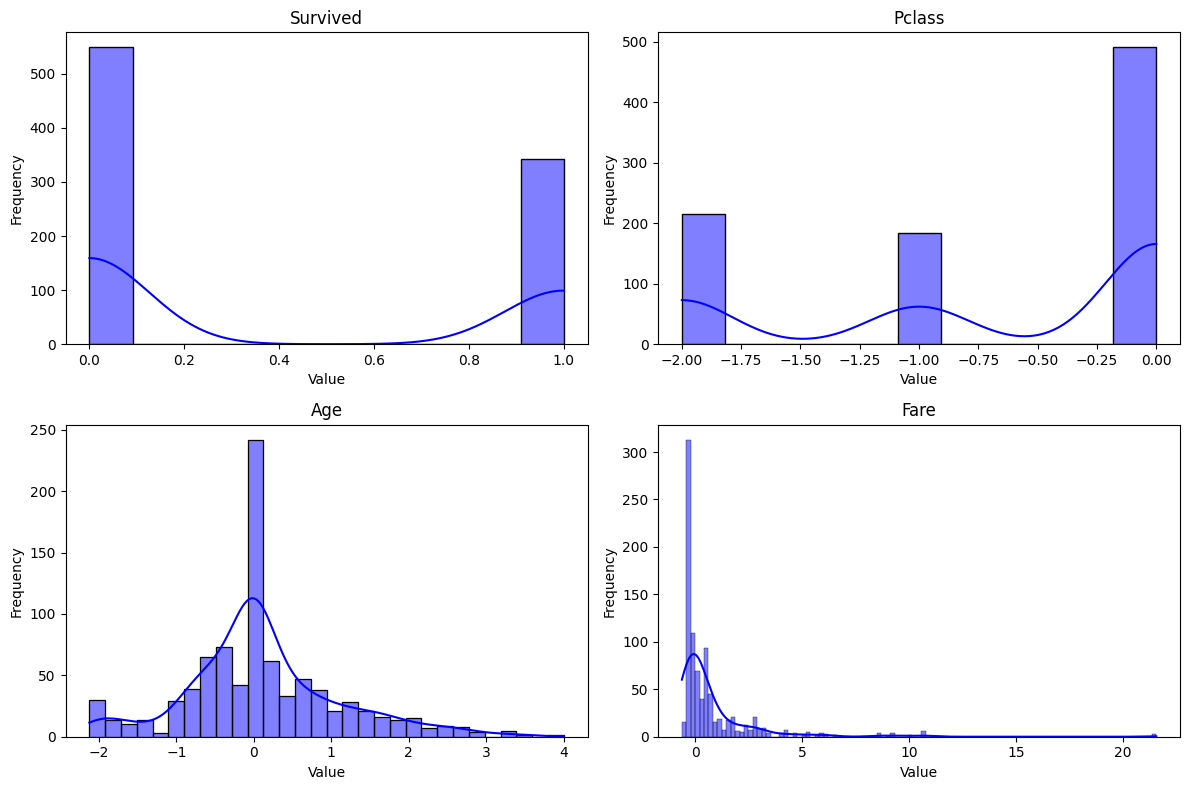

In [145]:
# Create subplots with 2 plots per row
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Plot histograms for each column
for i, column in enumerate(rb_scaled_df.columns):
    sns.histplot(rb_scaled_df[column], kde=True, color='blue', edgecolor='black', ax=axs[i])
    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# **Guassian Transformations:**
# **A common practice is to first apply transformations to address skewness and then scale the features.  However, always consider the specifics of your dataset and the requirements of the algorithms you plan to use.**

* Logarithmic Transformation
* Reciprocal Trasformation
* Square Root Transformation
* Exponential Trasformation (can use any exponent)
* Box Cox Transformation

**Why we need to change the distribution to Gaussian?
Here's why:**

* **Algorithm Assumptions:** Many machine learning algorithms assume that the input data has a Gaussian distribution. This assumption underlies linear regression models, logistic regression, and linear discriminant analysis, among others. When features follow a normal distribution, these algorithms can perform better and make more reliable predictions.

* **Improved Model Performance:** Features with a Gaussian distribution often lead to better model performance. This is because normally distributed data tends to have useful properties, such as symmetry around the mean, which can make training more efficient and lead to more stable models.

* **Linear Relationships:** Transforming skewed data to approximate a normal distribution can help linearize relationships between variables. Many models, especially linear models, perform better when the relationships between predictors and the target variable are linear.

* **Reducing the Impact of Outliers:** Skewed data can be heavily influenced by outliers, which can distort the model's understanding of the data. Transforming the data to a more Gaussian distribution can lessen the impact of outliers, leading to a more robust model.

* **Feature Scaling and Normalization:** Algorithms that rely on **gradient descent (such as neural networks) or that compute distance metrics (like k-Nearest Neighbors and Support Vector Machines)** can converge more quickly and perform more consistently if the features exhibit a normal distribution. This is because the features are on a similar scale and follow a predictable pattern.

* **Homoscedasticity:** In statistics and regression analysis, homoscedasticity (constant variance) is a desirable property where the variance of errors or the dependent variable is consistent across all levels of an independent variable. Gaussian-distributed features are more likely to meet this assumption, leading to more reliable statistical inferences and predictions.

* **Simplifying Data Interpretation:** Data that follows a Gaussian distribution can be easier to interpret and analyze. Many statistical tests and techniques, such as **t-tests and ANOVAs**, assume normality and can provide more meaningful insights when this assumption is met.



---


# **There is often a need to apply scaling techniques even after converting your data to approximate a Gaussian distribution:**

**Different Ranges:** Transforming data to make it more Gaussian typically addresses the **shape of the distribution but doesn't necessarily scale the data to a consistent range across features.** For example, after a log transformation, one feature might range from 0 to 10, while another might range from 0 to 1000. Scaling ensures that all features contribute equally to the model's performance, preventing features with larger ranges from dominating those with smaller ranges.

# **Logarithmic Transformation**

In [146]:
df=pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [147]:
df.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [148]:
df['Fare'].min()

0.0

**Replacing 0 with 1 for now.**

In [149]:
df['Fare'] = df['Fare'].replace(0, 1)

In [150]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

Handling missing values with the median

In [151]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [152]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

# **Histograms vs QQ-Plots**

**Histograms:** Imagine you have a pile of different-sized balls. A histogram is like counting how many balls of each size you have and making a bar chart to show it. It helps you see how your data is spread out.

**QQ Plots:** Now, imagine you have an ideal set of balls, perfectly evenly spaced from small to large. A QQ plot compares your actual pile of balls to this ideal set. If most of your balls line up well with the ideal set, your data is similar to what you expected. If they don't line up, your data might be different in some way.

In [153]:
import scipy.stats as stat
import pylab

In [154]:
# making a copy of original df
copy_df = df.copy()

In [155]:
# defining a QQ-Plot method
def plot_df(dataframe, feature):
  plt.figure(figsize = (10,6))
  plt.subplot(1, 2, 1)
  dataframe[feature].hist()
  plt.subplot(1, 2, 2)
  stat.probplot(dataframe[feature], dist = 'norm', plot = pylab)
  plt.show()

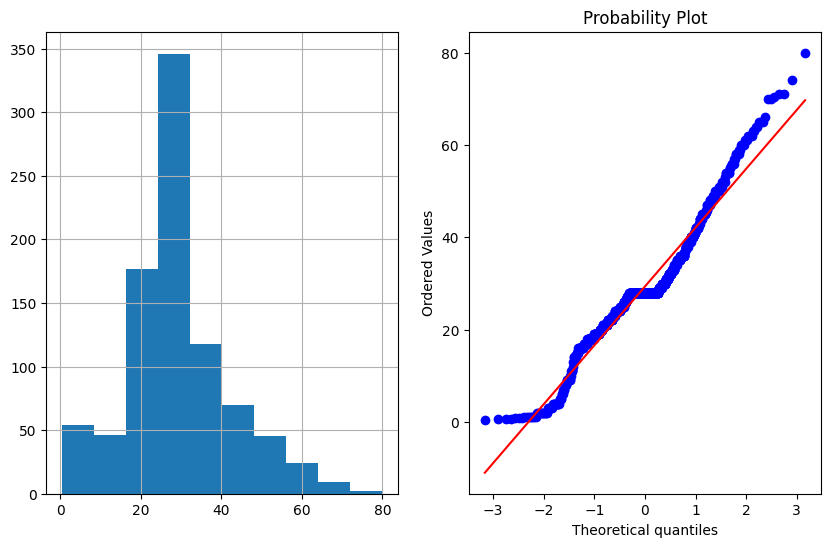

In [156]:
# Calling the method
plot_df(copy_df, 'Age')

**Above is plotted without any transformation!**

# **Now applying Log Transformation:**

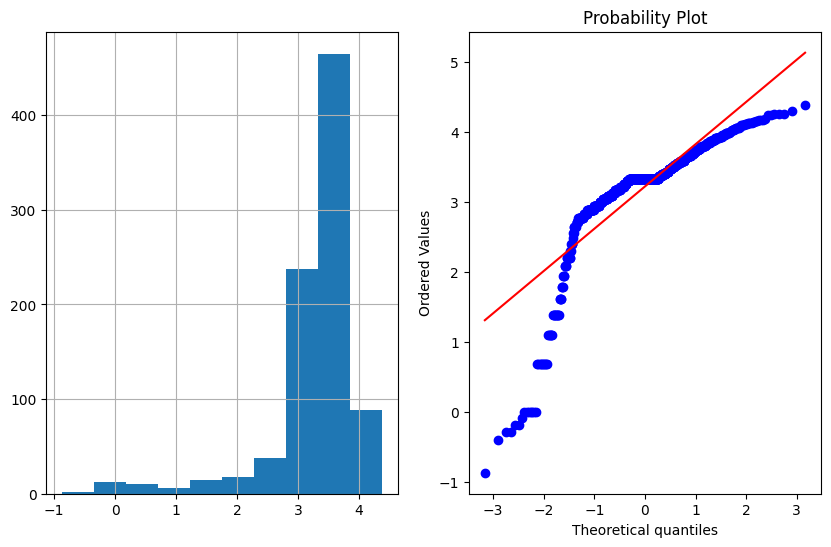

In [157]:
copy_df['Log_Age'] = np.log(copy_df['Age'])
plot_df(copy_df, 'Log_Age')

**It can be seen that Log Transformation is not suitble!**

**Applying for Fare**

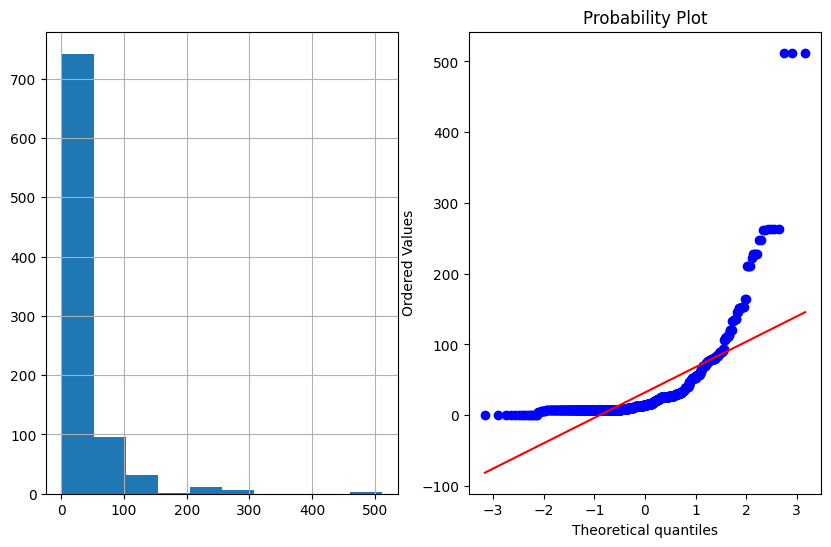

In [158]:
# Calling
plot_df(copy_df, 'Fare')

**NOTE: There are some 0 values in Fare, so using np.log1p method which will add 1 to each entry to prevent error**

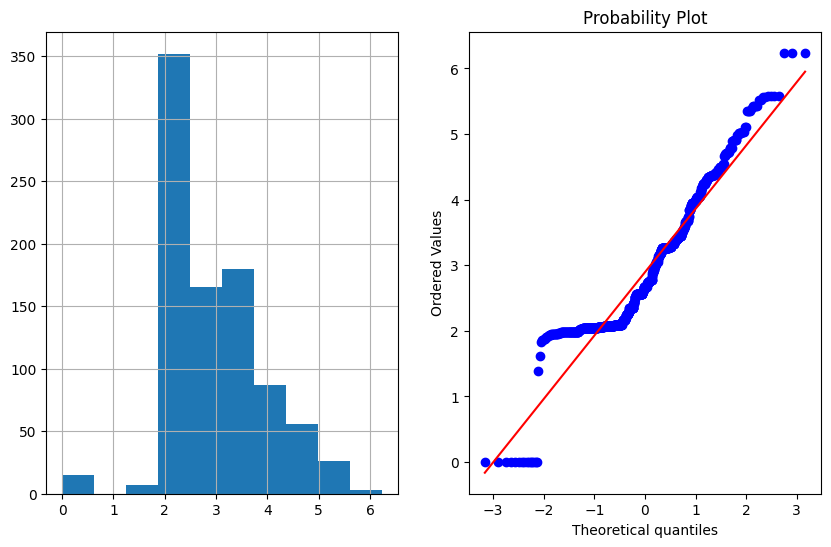

In [159]:
# Plotting
copy_df['Log_Fare'] = np.log(copy_df['Fare'])
plot_df(copy_df, 'Log_Fare')

# **Reciprocal Transformation**

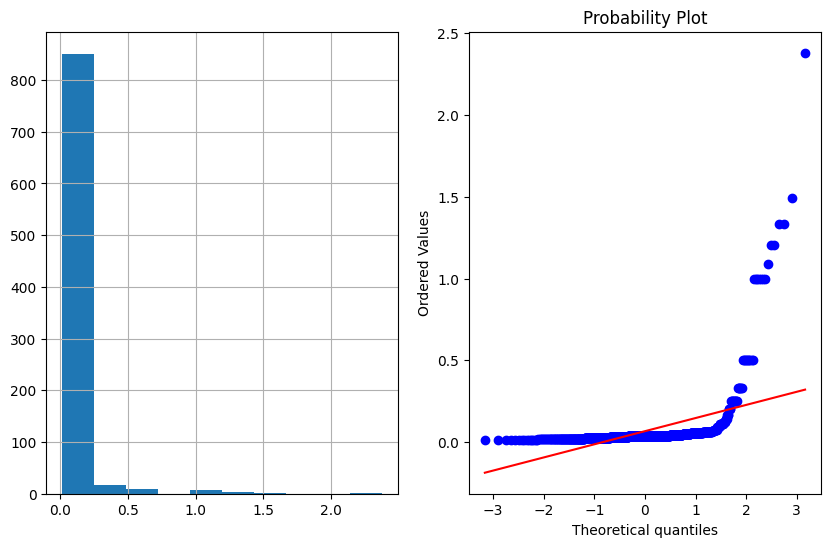

In [160]:
# applying for Age
copy_df['Reci_Age'] = 1/copy_df.Age
plot_df(copy_df, 'Reci_Age')

**Not good too!**

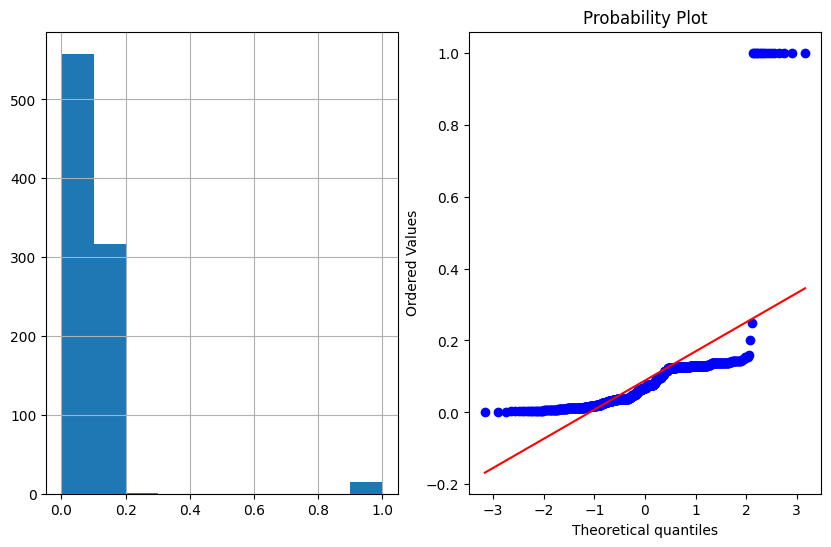

In [161]:
# applying for Fare
copy_df['Reci_Fare'] = 1/copy_df.Fare
plot_df(copy_df, 'Reci_Fare')

# **Square Root Transformation**

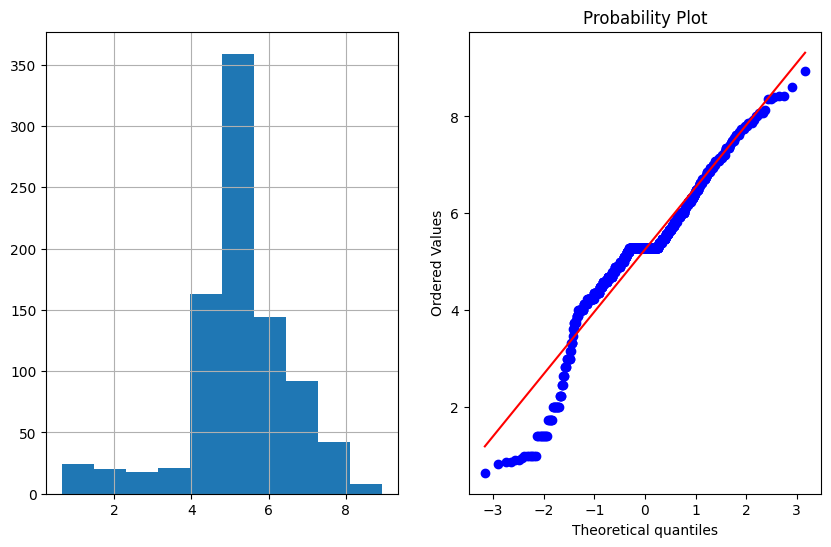

In [162]:
# applying for Age
copy_df['Root_age'] = np.sqrt( copy_df['Age'] )
plot_df(copy_df, 'Root_age')

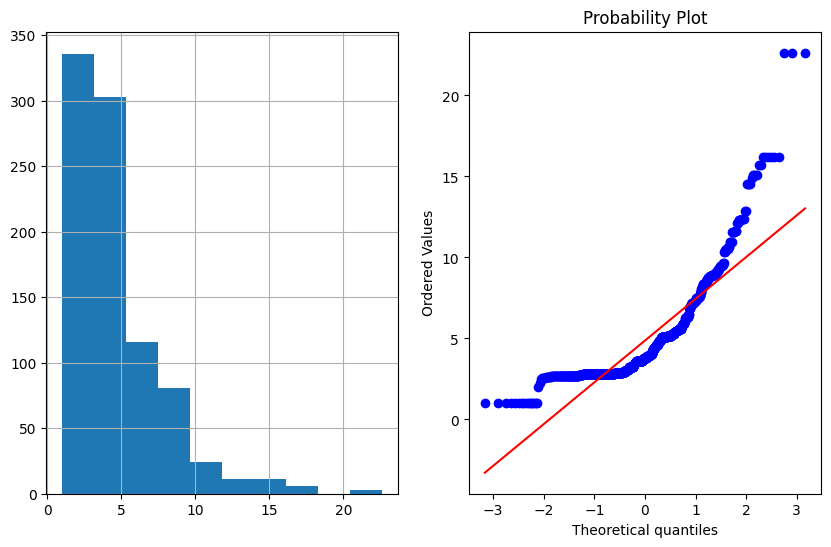

In [163]:
# applying for Fare
copy_df['Root_Fare'] = np.sqrt( copy_df['Fare'] )
plot_df(copy_df, 'Root_Fare')

# **Exponential/Power Transformation**

* Exponential Transformation is useful for handling **right-skewed** data and making it more symmetric.

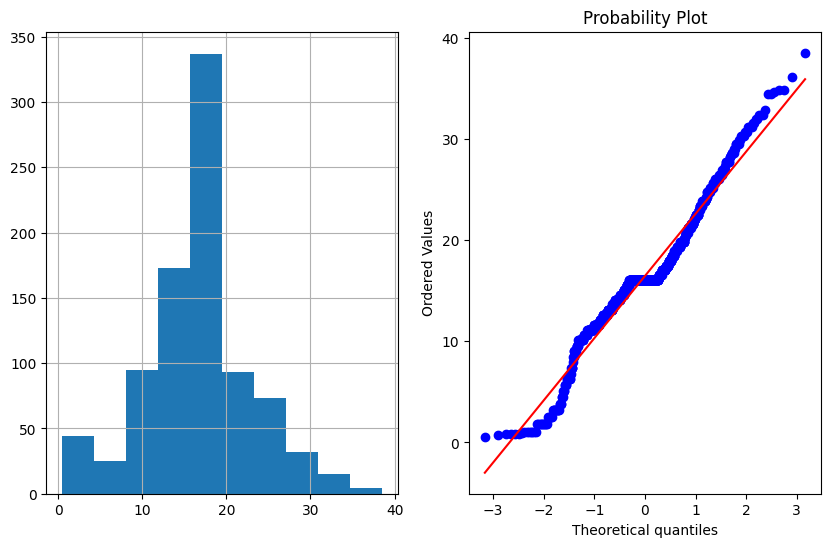

In [164]:
power = 1.2  # Change this value to adjust the power

# Apply the power transformation
copy_df['Exp_Age'] = copy_df['Age'] ** (1 / power)
plot_df(copy_df, 'Exp_Age')

In [165]:
copy_df

,Survived,Age,Fare,Log_Age,Log_Fare,Reci_Age,Reci_Fare,Root_age,Root_Fare,Exp_Age
0,0,22.0,7.2500,3.091042,1.981001,0.045455,0.137931,4.690416,2.692582,13.142729
1,1,38.0,71.2833,3.637586,4.266662,0.026316,0.014029,6.164414,8.442944,20.724608
2,1,26.0,7.9250,3.258097,2.070022,0.038462,0.126183,5.099020,2.815138,15.105825
3,1,35.0,53.1000,3.555348,3.972177,0.028571,0.018832,5.916080,7.286975,19.351889
4,0,35.0,8.0500,3.555348,2.085672,0.028571,0.124224,5.916080,2.837252,19.351889
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,3.295837,2.564949,0.037037,0.076923,5.196152,3.605551,15.588457
887,1,19.0,30.0000,2.944439,3.401197,0.052632,0.033333,4.358899,5.477226,11.631293
888,0,28.0,23.4500,3.332205,3.154870,0.035714,0.042644,5.291503,4.842520,16.068119
889,1,26.0,30.0000,3.258097,3.401197,0.038462,0.033333,5.099020,5.477226,15.105825


# **BoxCox Transformation**

It involves a parameter, 'Lambda'

In [166]:
# applying for Age
copy_df['BoxCox_Age'], parameters = stat.boxcox(copy_df['Age'])

In [167]:
print(parameters)

0.7964531473656952


**This is the optimal Lambda parameter which is found based on Age column**

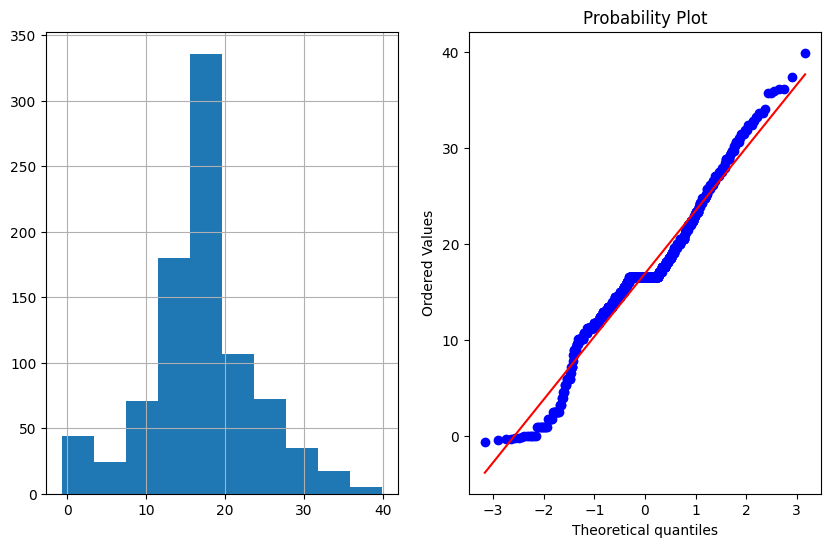

In [168]:
# plotting
plot_df(copy_df, 'BoxCox_Age')

**Quite Good!**

**Thats all about Feature Scaling and
Distribution Transformation. Hope you like it!**